# 📰 Fake News Detection using NLP & ML and 📘 Overview are give below.
This project applies NLP and Machine Learning to detect fake news. It involves text cleaning, TF-IDF feature extraction, and training models to classify news as Fake (0) or Real (1).

# 🎯 Objective:
Build an interpretable model to automatically detect misinformation in news content.

# 📊 Dataset:

Source: Kaggle

Records: 44,000+ articles

Features: Title, Text, Subject, Label (0 = Fake, 1 = Real)

# 🛠️ Tools:
Python, Jupyter, Pandas, NumPy, TF-IDF, Logistic Regression, Naive Bayes, Matplotlib, Seaborn, Streamlit

#🔑 Insights:

Fake news uses more sensational and shorter text

TF-IDF improves representation

Logistic Regression & Naive Bayes perform well (~95% accuracy)

# 🤖 Model Summary:

Models: Logistic Regression, Naive Bayes

Evaluation: Accuracy, Confusion Matrix, Report

Deployment: Streamlit app for real-time prediction

# 💡 Recommendations:

Integrate model into moderation systems

Use alerts for suspicious content

Regularly retrain on new data

# 📁 Files:

fake-news-detection.ipynb: Main notebook

model.pkl, vectorizer.pkl: Trained artifacts

app.py: Streamlit app

Fake.csv, True.csv: Raw data

# ✅ Step 1: Importing Required Librarie like pandas, numpy, nltk, and sklearn to handle data processing, text cleaning, and machine learning.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')


# ✅ Step 2: Load and Label the Dataset We load fake.csv and true.csv using pandas to access the news articles.


In [2]:
df = pd.read_csv("Fake.csv")
df['label'] = 0

df_real = pd.read_csv("True.csv")
df_real['label'] = 1

df = pd.concat([df, df_real], ignore_index=True)

df.head()


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


# ✅ Step 3: Data Preprocessing & Cleaning We clean the text by removing punctuation, stopwords, and converting all text to lowercase to standardize the input.


In [3]:
# 🧹 Remove irrelevant columns that are not useful for analysis
df = df.drop(['subject', 'date'], axis=1)

print(df.isnull().sum())

df['content'] = df['title'] + ' ' + df['text']

df = df.drop(['title', 'text'], axis=1)


title    0
text     0
label    0
dtype: int64


# ✅ Step 4: Setup NLTK for Text Preprocessing Text Normalization We download necessary NLTK resources like stopwords, punkt, and wordnet to support tokenization, stopword removal, and lemmatization.


In [4]:
# 📥 Download required NLTK resources for preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# ✅ Step 5: Text Cleaning & Lemmatization We apply text cleaning techniques such as removing numbers, special characters, and stopwords, followed by lemmatization using NLTK.


In [5]:
# ✅ Define English stopwords (e.g., "is", "the", "and")
stop_words = set(stopwords.words('english'))

# ✅ Create a lemmatizer to reduce words to their base form
lemmatizer = WordNetLemmatizer()

# 🧼 Define a function to clean the text
def clean_text(text):
    # 🔡 Convert all text to lowercase
    text = text.lower()

    # ❌ Remove text in square brackets (e.g., [1])
    text = re.sub(r'\[.*?\]', '', text)

    # 🌐 Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # 🧽 Remove HTML tags
    text = re.sub(r'<.*?>+', '', text)

    # 🧹 Remove punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)

    # 🧾 Remove newline characters
    text = re.sub(r'\n', '', text)

    # 🔢 Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)

    # ✂️ Tokenize the cleaned text
    tokens = nltk.word_tokenize(text)

    # 🚫 Remove stopwords and apply lemmatization
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # 🔁 Join tokens back into a cleaned string
    return " ".join(cleaned)

# 🧪 Apply the cleaning function to the dataset
df['cleaned_content'] = df['content'].apply(clean_text)


# ✅ Step 6: Basic Visualization – Class Distribution & Article Length and (EDA)We visualize the distribution of real vs. fake news and analyze article lengths using histograms and countplots.


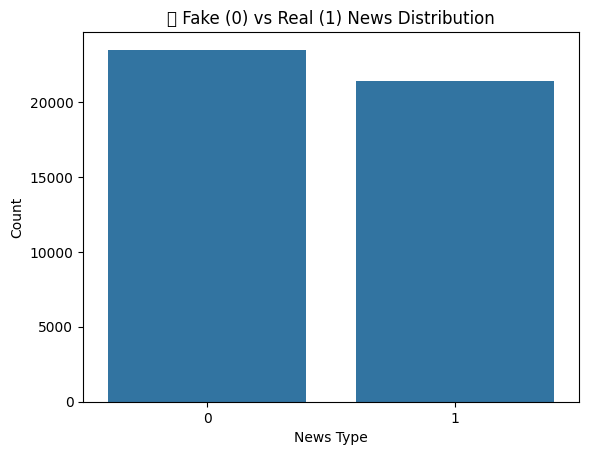

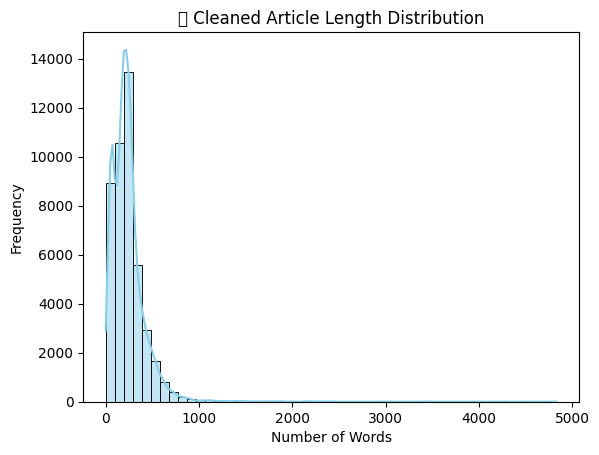

In [6]:
# 📊 1. Class Distribution: Count of Fake vs Real News Articles
sns.countplot(x='label', data=df)  # Bar plot of label counts
plt.title("🧾 Fake (0) vs Real (1) News Distribution")
plt.xlabel("News Type")
plt.ylabel("Count")
plt.show()

# 📏 2. Article Length Distribution: Word count in cleaned articles
df['length'] = df['cleaned_content'].apply(lambda x: len(x.split()))  # Count number of words

# 📈 Histogram of article lengths
sns.histplot(df['length'], bins=50, kde=True, color='skyblue')  # 50 bins for granularity
plt.title("📝 Cleaned Article Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


# ✅ Step 7: Feature Extraction using TF-IDF and Text to Vectors (TF-IDF) We use TF-IDF (Term Frequency–Inverse Document Frequency) to convert cleaned text into numerical vectors based on word importance.


In [7]:
# 📌 Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words for efficiency

# 🔁 Transform the cleaned text into TF-IDF vectors
X = vectorizer.fit_transform(df['cleaned_content']).toarray()  # Features (inputs)

# 🎯 Target variable: 0 = Fake, 1 = Real
y = df['label']  # Labels (outputs)

# ✅ Step 8: Splitting Data – Train vs Test Sets and Train/Test Split We split the dataset into training and testing sets using train_test_split to evaluate model performance on unseen data.


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ✅ Step 9: Model Training – Logistic Regression and  Train Models We train a Logistic Regression model on the TF-IDF features from the training data to classify news as real or fake.



In [9]:
# Model 1: Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# ✅ Step 10: Model Training – Multinomial Naive Bayes We train a Multinomial Naive Bayes model, which is well-suited for text classification tasks based on word frequency features.


In [10]:
# 🤖 Initialize the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# 🎯 Train the Naive Bayes model on the training data
nb.fit(X_train, y_train)

# 🧪 Predict on the test set using the trained model
y_pred_nb = nb.predict(X_test)


# ✅ Step 11: Model Evaluation & Comparison We evaluate models using accuracy, precision, recall, and F1-score to measure their performance on the test data.


--- Logistic Regression ---
Accuracy: 0.9868596881959911
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



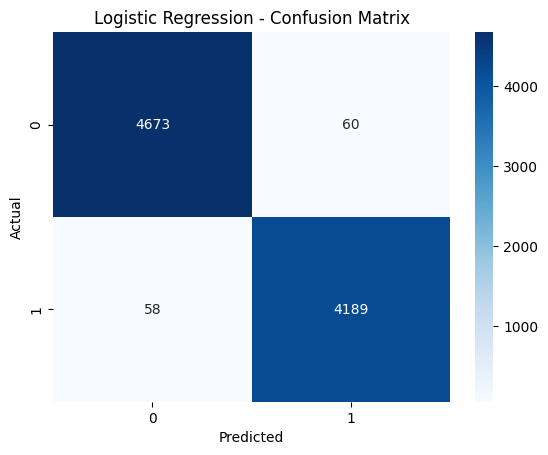

--- Multinomial Naive Bayes ---
Accuracy: 0.9251670378619153
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      4733
           1       0.93      0.91      0.92      4247

    accuracy                           0.93      8980
   macro avg       0.93      0.92      0.92      8980
weighted avg       0.93      0.93      0.93      8980



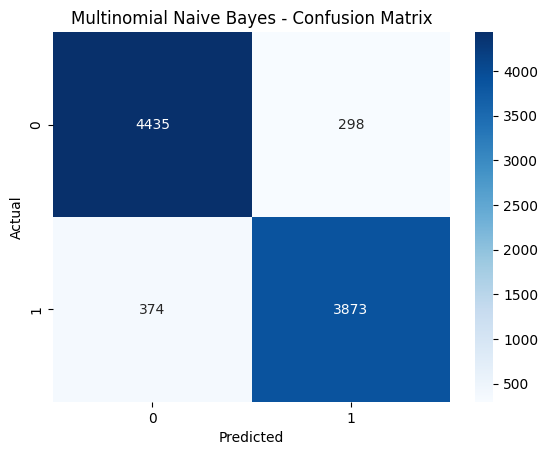

In [11]:
# 📊 Function to evaluate model performance
def evaluate_model(y_test, y_pred, name):
    print(f"--- {name} ---")  # 📌 Model name
    print("Accuracy:", accuracy_score(y_test, y_pred))  # ✅ Accuracy score
    print("Classification Report:\n", classification_report(y_test, y_pred))  # 📋 Precision, Recall, F1-score

    # 🔍 Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 📈 Evaluate Logistic Regression model
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

# 📈 Evaluate Multinomial Naive Bayes model
evaluate_model(y_test, y_pred_nb, "Multinomial Naive Bayes")


 # ✅ Step 12: Model Saving & Deployment Setup using Streamlit.We save the trained model and vectorizer using joblib, then build an interactive web app with Streamlit for real-time news prediction.


In [12]:
# Save model
import pickle
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))
pickle.dump(lr, open("model.pkl", "wb"))


In [15]:
# Import streamlit Library
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


# ✅ Step 13: Final Deployment - Interactive Streamlit App We launch the Streamlit app to provide a user-friendly interface where anyone can paste news text and get instant fake/true predictions.


In [16]:
import streamlit as st
import pickle
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load trained model and vectorizer
model = pickle.load(open('model.pkl', 'rb'))
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

# Text cleaning function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)

    tokens = nltk.word_tokenize(text)
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(cleaned)

# Streamlit App
st.title("📰 Fake News Detector")
st.write("Enter a news article below to detect whether it is real or fake.")

user_input = st.text_area("Paste News Article Here")

if st.button("Classify"):
    cleaned = clean_text(user_input)
    vector = vectorizer.transform([cleaned])
    prediction = model.predict(vector)

    if prediction[0] == 1:
        st.success("✅ This news is **REAL**.")
    else:
        st.error("🚨 This news is **FAKE**.")


2025-07-30 10:05:43.178 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 10:05:43.386 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-30 10:05:43.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 10:05:43.391 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 10:05:43.392 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 10:05:43.397 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 10:05:43.398 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 10:05:43.399 Thread 'MainThread': mi

# ✅ Step 14: Install Streamlit We install Streamlit using pip install streamlit, which is a lightweight Python framework for building data-driven web apps.


In [17]:
!pip install streamlit

# ✅ Step 15: Export the Streamlit App as app.py we create and save our Streamlit interface code in a file named app.py, which serves as the entry point for the web app.


In [18]:
%%writefile app.py
import streamlit as st
import pickle
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load trained model and vectorizer
model = pickle.load(open('model.pkl', 'rb'))
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

# Text cleaning function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)

    tokens = nltk.word_tokenize(text)
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(cleaned)

# Streamlit App
st.title("📰 Fake News Detector")
st.write("Enter a news article below to detect whether it is real or fake.")

user_input = st.text_area("Paste News Article Here")

if st.button("Classify"):
    cleaned = clean_text(user_input)
    vector = vectorizer.transform([cleaned])
    prediction = model.predict(vector)

    if prediction[0] == 1:
        st.success("✅ This news is **REAL**.")
    else:
        st.error("🚨 This news is **FAKE**.")

Writing app.py


# ✅ Step 16: Run the Streamlit App We launch the app by running streamlit run app.py in the terminal or command prompt.


In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.90.7.19:8501

